In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time


In [31]:
import os

# Get the current directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Get the grandparent directory
grandparent_dir = os.path.dirname(parent_dir)


In [32]:
# get todays date in day-month format
today = time.strftime("%d-%m")

alg_name = 'deepcfr'
fn = '/marl_dominoes/results/deep_cfr_v_random.csv'


In [33]:
df = pd.read_csv(grandparent_dir + fn, index_col=0)

# Define a function to convert the 'Rewards' column from string to list of floats
def convert_rewards(rewards_str):
    # Remove the brackets and split the string into a list of strings
    rewards_list_str = rewards_str[1:-1].split()
    # Convert the list of strings into a list of floats
    rewards_list_float = [float(reward) for reward in rewards_list_str]
    return rewards_list_float

# Apply this function to the 'Rewards' column
df['Rewards'] = df['Rewards'].apply(convert_rewards)

# multiply the rewards by 2 (to normalize)
df['Rewards'] = df['Rewards'].apply(lambda x: [i*2 for i in x])

# Split the 'Rewards' column into two separate columns
df[['Reward1', 'Reward2']] = pd.DataFrame(df['Rewards'].to_list(), index=df.index)

# Drop the original 'Rewards' column
df2 = df.drop('Rewards', axis=1)
df2.head()

,Iteration,Time,Reward1,Reward2
0,1,1.405105,4.244,-1.942
1,2,1.290804,5.800,-4.642
2,3,1.359672,6.644,-1.186
3,4,1.308409,5.718,-0.476
4,5,1.358082,6.944,-0.478


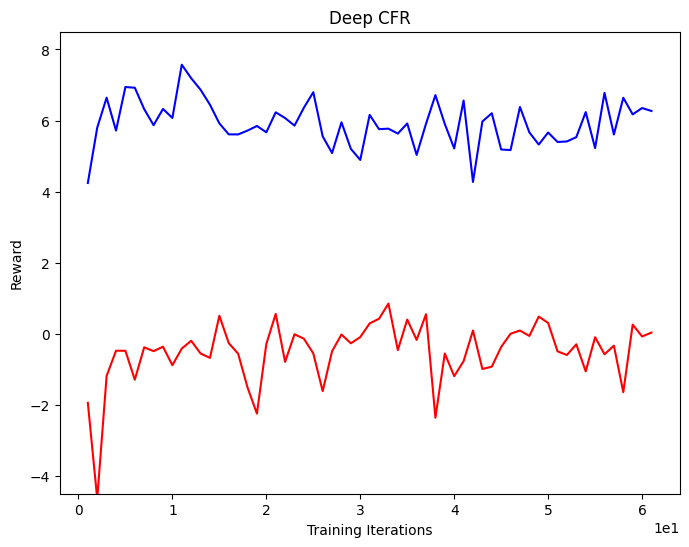

In [34]:
fig = plt.figure(figsize=(8, 6))
plt.plot(df['Iteration'], df['Reward1'],  color='blue', label='Player 1')
plt.plot(df['Iteration'], df['Reward2'], color='red', label='Player 2')

plt.xlabel('Training Iterations')
plt.ylabel('Reward')
plt.title('Deep CFR')

# Specify the minimum and maximum y values
plt.ylim([-4.5, 8.5])  # replace ymin and ymax with your desired values

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.show()

now random

In [35]:
fn1 = '/marl_dominoes/results/random_v_random.csv'

df1 = pd.read_csv(grandparent_dir + fn1, index_col=0)


# Apply this function to the 'Rewards' column
df1['Rewards'] = df1['Rewards'].apply(convert_rewards)

# Split the 'Rewards' column into two separate columns
df1[['Reward1', 'Reward2']] = pd.DataFrame(df1['Rewards'].to_list(), index=df1.index)

# Drop the original 'Rewards' column
df1 = df1.drop('Rewards', axis=1)
df1.head()

,Iteration,Reward1,Reward2
0,1,2.710,-2.701
1,2,3.201,-3.494
2,3,3.510,-2.938
3,4,2.006,-2.550
4,5,3.200,-2.668


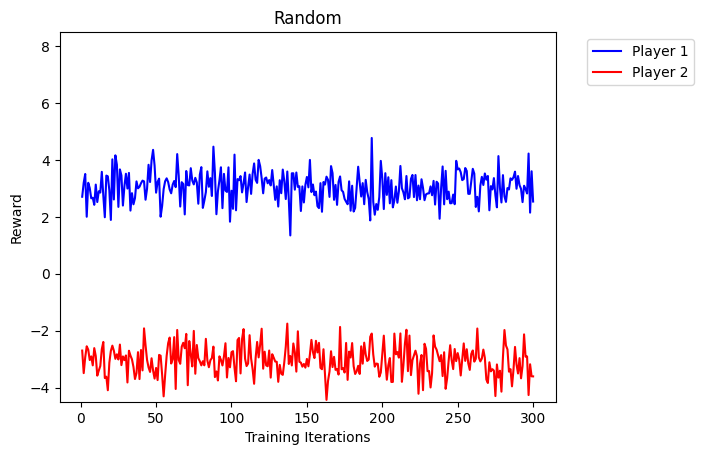

In [36]:
fig = plt.figure()
plt.plot(df1['Iteration'], df1['Reward1'],  color='blue', label='Player 1')
plt.plot(df1['Iteration'], df1['Reward2'], color='red', label='Player 2')

plt.xlabel('Training Iterations')
plt.ylabel('Reward')
plt.title('Random')

# Specify the minimum and maximum y values
plt.ylim([-4.5, 8.5]) 


# Place the legend outside of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [37]:
# nfsp now 
fn = '/marl_dominoes/results/nfsp_v_random.csv'

df2 = pd.read_csv(grandparent_dir + fn, index_col=0)

df2['Rewards'] = df2['Rewards'].apply(convert_rewards)

# Split the 'Rewards' column into two separate columns
df2[['Reward1', 'Reward2']] = pd.DataFrame(df2['Rewards'].to_list(), index=df2.index)

# Drop the original 'Rewards' column
df2 = df2.drop('Rewards', axis=1)
df2.head()

,Iteration,Reward1,Reward2
0,1000,3.139,-3.345
1,2000,3.735,-2.260
2,3000,3.442,-2.612
3,4000,2.958,-2.262
4,5000,2.256,-2.712


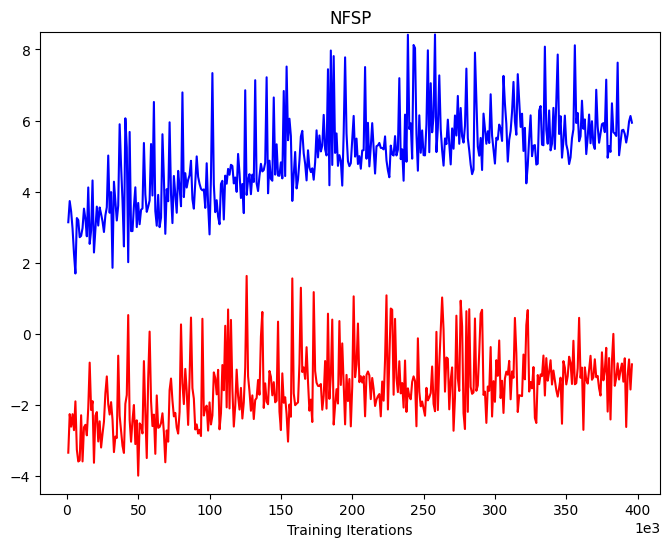

In [38]:
fig = plt.figure(figsize=(8, 6))

# # Add horizontal dotted lines for the mean rewards of the random agents
# plt.axhline(y=mean3, color='gray', linestyle='--', label='Mean rewards')
# plt.axhline(y=mean4, color='gray', linestyle='--', label='')


plt.plot(df2['Iteration'], df2['Reward1'],  color='blue', label='Player 1')
plt.plot(df2['Iteration'], df2['Reward2'], color='red', label='Player 2')




plt.xlabel('Training Iterations')
# plt.ylabel('Reward')
plt.title('NFSP')

# Specify the minimum and maximum y values
plt.ylim([-4.5, 8.5])  # replace ymin and ymax with your desired values

# Make the x-axis appear in scientific notation
plt.ticklabel_format(style='sci', axis='x', scilimits=(3,3))


plt.show()

In [39]:
# get the mean and std of the rewards

# deep cfr
mean1 = df['Reward1'].mean()
std1 = df['Reward1'].std()

mean2 = df['Reward2'].mean()
std2 = df['Reward2'].std()

# random
mean3 = df1['Reward1'].mean()
std3 = df1['Reward1'].std()

mean4 = df1['Reward2'].mean()
std4 = df1['Reward2'].std()

# nfsp
mean5 = df2['Reward1'].mean()
std5 = df2['Reward1'].std()

mean6 = df2['Reward2'].mean()
std6 = df2['Reward2'].std()



print(f"Deep CFR: Player 1 mean: {mean1:.2f}, std: {std1:.2f}")
print(f"Deep CFR: Player 2 mean: {mean2:.2f}, std: {std2:.2f}")
print()
print(f"Random 1: Player 1 mean: {mean3:.2f}, std: {std3:.2f}")
print(f"Random 1: Player 2 mean: {mean4:.2f}, std: {std4:.2f}")
print()
print(f"NFSP: Player 1 mean: {mean5:.2f}, std: {std5:.2f}")
print(f"NFSP: Player 2 mean: {mean6:.2f}, std: {std6:.2f}")



Deep CFR: Player 1 mean: 5.92, std: 0.65
Deep CFR: Player 2 mean: -0.51, std: 0.86

Random 1: Player 1 mean: 3.04, std: 0.53
Random 1: Player 2 mean: -3.04, std: 0.51

NFSP: Player 1 mean: 5.02, std: 1.21
NFSP: Player 2 mean: -1.51, std: 0.99
